# Python Project | Python_Project_2406_ED1

The Following report is compiled by the following learners
|      Full Name      | Email Address                 |
|---------------------|-------------------------------|
|Marcus Van Staden    |marcus.vanstaden@vodacom.co.za |
|Theo Tsinyane        |theo.tsinyane@vodacom.co.za    |
|Mfana Nkabinde       |mfana.nkabinde@vodacom.co.za   |
|Manqoba Mnguni       |manqoba.mnguni@vodacom.co.za   |

## 1. Project Overview

##### 1.1. Dataset Overview

The Avocado Sales Data is collected varius regions in United States. The data is collected from 3rd of January 2015 to 4th of January 2023. The Sales volumes are aggregated to the Avocado types per Region and the volumes are measured in Ounces (oz) where 1 ounce is approximately 29.5 milliliters then the Selling price is in US currency (US Dollars). The data can be exported from 
[Avocado Prices Dataset](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/code "Visit Example Website") as a csv file.

##### 1.2. Problem Statement and Objective 

The Avocados are packaged in different sizes ranging from the small bag to Extra large bag. However the customers turn to prefer a certain size of the Avocado bag. Knowing exactly which bag size to pre-package in large volume is the desired outcome. 

The data collected will be analysed and used to make decision on which Bag size should be Pre-package more, this will evident by analysing which bag is sold faster.

##### 1.3. Data Dictionary

| Business Attribute     | Data Element | Business Definition | DataType |
| -----------------------|--------------|---------------------|----------|
|Selling Date            |     Date     |The date of the last day of the week in YYYY-MM-DD format  | Object         |
|Average Selling Price   | AveragePrice |The average selling price in US$ for non-organic Hass avocados. Not adjusted for inflation    | float64      |
|Total Volume            | TotalVolume  | The Total Volume of the Bags sold.         |  float64           |
|Price Look Up 4046      |plu4046            | non-organic small/medium Hass Avocados (~3-5 oz)          | float64             |
|Price Look Up 4225      | plu4225           | non-organic large Hass Avocados (~8-10 oz)         | float64             |
|Price Look Up 4770      |  plu4770          | non-organic extra large Hass Avocados (~10-15 oz)         |  float64            |
|Total Bags              |  TotalBags          | The bags indicate a pre-packaged container consisting of a variable number of avocados of mixed PLU type         | float64             |
|Small Bags              |  SmallBags          |The amount of non-organic Hass avocados (they can be a mix of PLUs) sold in small pre-packaged containers/bags in US pounds. This does not include avocados sold individually.          |   float64           |
|Large Bags              |  LargeBags          |          | float64             |
|Extra Large Bags        |  XLargeBags          |          | float64             |
|Avocado Type            |  type          | The type of Avocado sold, there are two type conventional or Organic         |Object             |
|Region                  |  region              |Regions are defined by the Hass Avocado Board and Locations are selected cities or sub-regions that are part of the overall Region.          | Object            |

## 2. Importing Packages

### 2.1. Install Packages

In [28]:
### RUN THE FOLLOWING INSTALL COMMANDS ONCE IN YOUR PYTHON ENVIROMENT
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install ipywidgets 
!pip install pyarrow
!pip install chart-studio
!pip install cufflinks

### 2.2. Import Packages

In [211]:
### RUN THE FOLLOWING IMPORT COMMANDS EACH TIME YOU OPEN THIS NOTEBOOK
import pandas                as pd 
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import scipy                 as sp
import scipy.stats           as st
### Do we need to add the comment next to each import statement


import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)



import cufflinks as cf
# Once again, we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [218]:
from ipywidgets import interact, interact_manual, widgets

## 3. Loading the Data

##### 3.1. Load statement for each member

In [55]:
df = pd.read_csv("C:/Users/Marcus/Documents/Python/Avocado_Dataset.csv")
df = pd.DataFrame(df)

### Need to replace this to read from Github

### Data Profiling 

In [57]:
df.shape

(53415, 12)

There are 53415 records and 12 columns in the dataset.

In [59]:
df.head()

Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington

From the snippet of the data set above we can clearly see that there are 12 colomns of various data types. Some columns are not named conventionally, hence aren't informative. The naming of the columns isn't standardized. There exists zeros(0) in some columns which questions the integrity/consistency of the data in those columns. 

In [62]:
df.tail()

Date  AveragePrice  TotalVolume    plu4046    plu4225  plu4770  \
53410  2023-12-03      1.550513      5693.91     204.64    1211.25     0.00   
53411  2023-12-03      1.703920    343326.10   66808.44  132075.11    58.65   
53412  2023-12-03      1.618931     34834.86   15182.42    1211.38     0.00   
53413  2023-12-03      1.245406      2942.83    1058.54       7.46     0.00   
53414  2023-12-03      1.479240   2010020.72  271808.32  274480.64    63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags     type            region  
53410     4278.03        NaN        NaN         NaN  organic            Toledo  
53411   138830.45        NaN        NaN         NaN  organic              West  
53412    18075.66        NaN        NaN         NaN  organic  WestTexNewMexico  
53413     1779.19        NaN        NaN         NaN  organic           Wichita  
53414  1364514.02        NaN        NaN         NaN  organic           TotalUS

By calling the bottom segment of the table, we're checking if the data stays consistent for the entirety of the table. In the regions, it seems that the elements in the columns lack standardization.
 
 
 
 
 
We then move on to figure of the types of data in each column.

In [65]:
df.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
plu4046         float64
plu4225         float64
plu4770         float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
region           object
dtype: object

We can clearly see that there are two data types in the table and they are all consistent with that we've seen in the data preview.

In [68]:
df.describe()

AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  4.102500e+04  4.102500e+04   41025.000000  
mean   2.175083e+05  1.039222e+05  2.331316e+04    2731.811796  
std    8.676947e+05  5.692608e+05  1.496622e+05   22589.096454  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    7.846520e+03  0.000000e+00  0.000000e+00       0.000000  
50%    3.695310e+04  6.945800e+02  0.000000e+00       0.000000  
75%    1.110146e+05  3.795298e+04  2.814920e+03       0.000000  
max    1.629830e+07  1.256716e+07  4.324231e+06  679586.800000

In [70]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

AveragePrice   TotalVolume       plu4046      plu4225      plu4770  \
min      0.440000  8.456000e+01  0.000000e+00         0.00        0.000   
25%      1.119091  1.626465e+04  6.947250e+02      2120.80        0.000   
50%      1.400000  1.203525e+05  1.458058e+04     17516.63       90.050   
75%      1.690000  4.542380e+05  1.287924e+05     93515.60     3599.735   
max      3.440830  6.103446e+07  2.544720e+07  20470572.61  2860025.190   

       TotalBags    SmallBags   LargeBags  XLargeBags  
min         0.00         0.00        0.00         0.0  
25%      7846.52         0.00        0.00         0.0  
50%     36953.10       694.58        0.00         0.0  
75%    111014.61     37952.98     2814.92         0.0  
max  16298296.29  12567155.58  4324231.19    679586.8

The describe function only looks at numeric data. We will then look to check if there are any missing values in the coulmns.

In [73]:
df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags        True
LargeBags        True
XLargeBags       True
type            False
region          False
dtype: bool

There exist missing values in three of the columns, namely; SmallBags, 
LargeBag, XLargeBags.

## 4. Data Cleaning

It is worth mentioning that with the dataset provided from Hass Avocado Board (HAS), there is some knowledge of the data that was imparted to us by the data collectors. We will continue with the project with the assumption that these are true.

1. The column regions includes both regions and key locations which are cities or sub-regions. The values for locations do not add up to that of regions.
2.  PLU referes to the product/price lookup code and is unique to a product.
3.  The columns with missing values have 23% of missing data each.

 We will try and fill in the missing values of these colums because there's a lot of missing data and dropping the rows with the missing data will truncate a lot of valuable data in other columns and make the analysis inaccurate.

In [83]:
df=df.sort_values(by=['Date'])
df

Date  AveragePrice  TotalVolume    plu4046     plu4225   plu4770  \
0      2015-01-04      1.220000     40873.28    2819.50    28287.42     49.90   
77     2015-01-04      1.540000      4212.16     238.48     1678.83    372.55   
76     2015-01-04      1.130000    182697.97   56293.75    80396.09   9762.41   
75     2015-01-04      2.010000      3397.00      58.22     1493.90    772.21   
74     2015-01-04      1.200000    221086.46   53316.16    72178.46  39928.01   
...           ...           ...          ...        ...         ...       ...   
53330  2023-12-03      0.891234    105955.49   58469.21    16165.30    268.30   
53329  2023-12-03      1.039719    554719.24  357659.65     7042.16     20.71   
53328  2023-12-03      1.155709   4778759.20  881108.32  2409888.29  19657.51   
53324  2023-12-03      1.046474    274018.46  139944.79    49992.98     10.96   
53414  2023-12-03      1.479240   2010020.72  271808.32   274480.64     63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0         9716.46    9186.93     529.53         0.0  conventional   
77        1922.30    1570.28     352.02         0.0       organic   
76       36245.72   31778.36    4467.36         0.0  conventional   
75        1072.67     993.94      78.73         0.0       organic   
74       55663.83   44040.64   11623.19         0.0  conventional   
...           ...        ...        ...         ...           ...   
53330    30168.07        NaN        NaN         NaN  conventional   
53329   169483.98        NaN        NaN         NaN  conventional   
53328  1305651.94        NaN        NaN         NaN  conventional   
53324    72791.80        NaN        NaN         NaN  conventional   
53414  1364514.02        NaN        NaN         NaN       organic   

                  region  
0                 Albany  
77       RichmondNorfolk  
76       RichmondNorfolk  
75     RaleighGreensboro  
74     RaleighGreensboro  
...                  ...  
53330  PeoriaSpringfield  
53329            Orlando  
53328          Northeast  
53324          Nashville  
53414            TotalUS  

[53415 rows x 12 columns]

Line graph: 


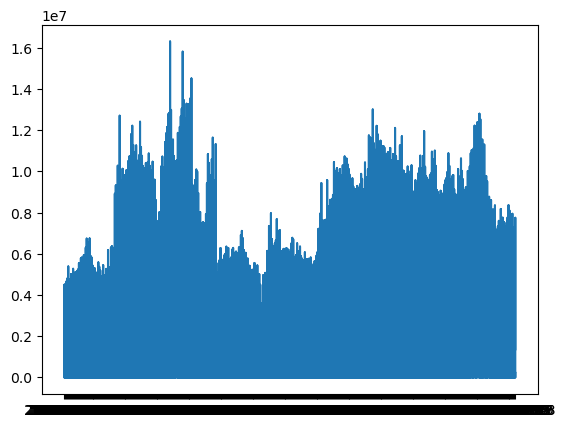

In [101]:
print("Line graph: ") 
plt.plot(df["Date"], df["TotalBags"]) 
plt.show()

Line graph: 


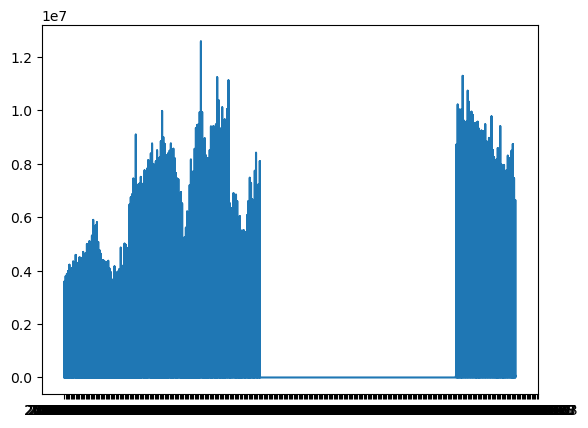

In [21]:
print("Line graph: ") 
plt.plot(df["Date"], df["SmallBags"]) 
plt.show()

Line graph: 


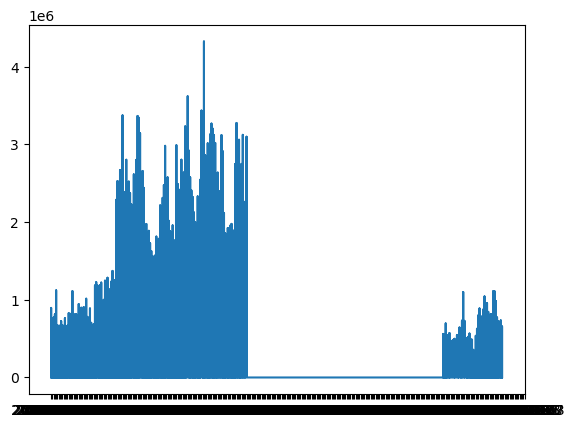

In [22]:
print("Line graph: ") 
plt.plot(df["Date"], df["LargeBags"]) 
plt.show()

Line graph: 


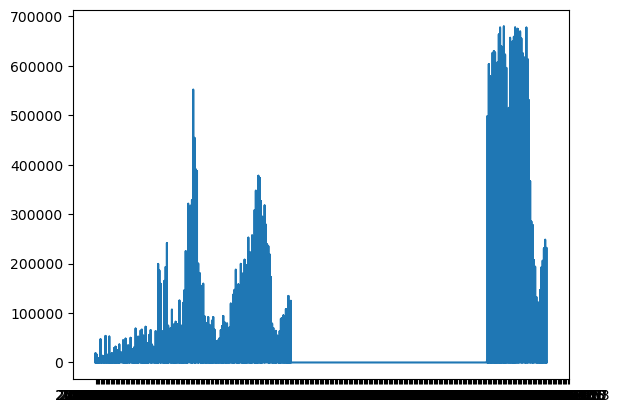

In [23]:
print("Line graph: ") 
plt.plot(df["Date"], df["XLargeBags"]) 
plt.show()

The columns with missing data show no trend and seems to have lost data for a certain amount of time and for some of this time the value was inintialized to zero(0). 



In [108]:
missing_ix = df[df['SmallBags'].isnull()].index

missing_ix

Index([41108, 41111, 41110, 41109, 41112, 41128, 41104, 41103, 41102, 41099,
       ...
       53335, 53334, 53333, 53332, 53331, 53330, 53329, 53328, 53324, 53414],
      dtype='int64', length=12390)

In [110]:
print(df["Date"].iloc[missing_ix])

41032    2021-12-05
41037    2021-12-05
41034    2021-12-05
41033    2021-12-05
41075    2021-12-05
            ...    
53407    2023-12-03
53408    2023-12-03
53409    2023-12-03
53411    2023-12-03
53414    2023-12-03
Name: Date, Length: 12390, dtype: object


In [112]:
missing_ix = df[df['LargeBags'].isnull()].index

missing_ix

Index([41108, 41111, 41110, 41109, 41112, 41128, 41104, 41103, 41102, 41099,
       ...
       53335, 53334, 53333, 53332, 53331, 53330, 53329, 53328, 53324, 53414],
      dtype='int64', length=12390)

In [114]:
print(df["Date"].iloc[missing_ix])

41032    2021-12-05
41037    2021-12-05
41034    2021-12-05
41033    2021-12-05
41075    2021-12-05
            ...    
53407    2023-12-03
53408    2023-12-03
53409    2023-12-03
53411    2023-12-03
53414    2023-12-03
Name: Date, Length: 12390, dtype: object


In [116]:
missing_ix = df[df['XLargeBags'].isnull()].index

missing_ix

Index([41108, 41111, 41110, 41109, 41112, 41128, 41104, 41103, 41102, 41099,
       ...
       53335, 53334, 53333, 53332, 53331, 53330, 53329, 53328, 53324, 53414],
      dtype='int64', length=12390)

In [118]:
print(df["Date"].iloc[missing_ix])

41032    2021-12-05
41037    2021-12-05
41034    2021-12-05
41033    2021-12-05
41075    2021-12-05
            ...    
53407    2023-12-03
53408    2023-12-03
53409    2023-12-03
53411    2023-12-03
53414    2023-12-03
Name: Date, Length: 12390, dtype: object


The missing data for the 3 columns is from 5 Dec 2021 to 3 Dec 2023.

###
Given the date range of the data, Jan 2015 to December 2023, one can assume the world pandemic COVID 19 has a hand in the missing data. To be specific, the stringent lock-downs caused the imports of avocados and hence the sales of avocados to come to a halt.




###
With that being said, we will replace all missing values with a zeros(0). But first we will check the skew of the data to ensure our approach does not affect the skew.

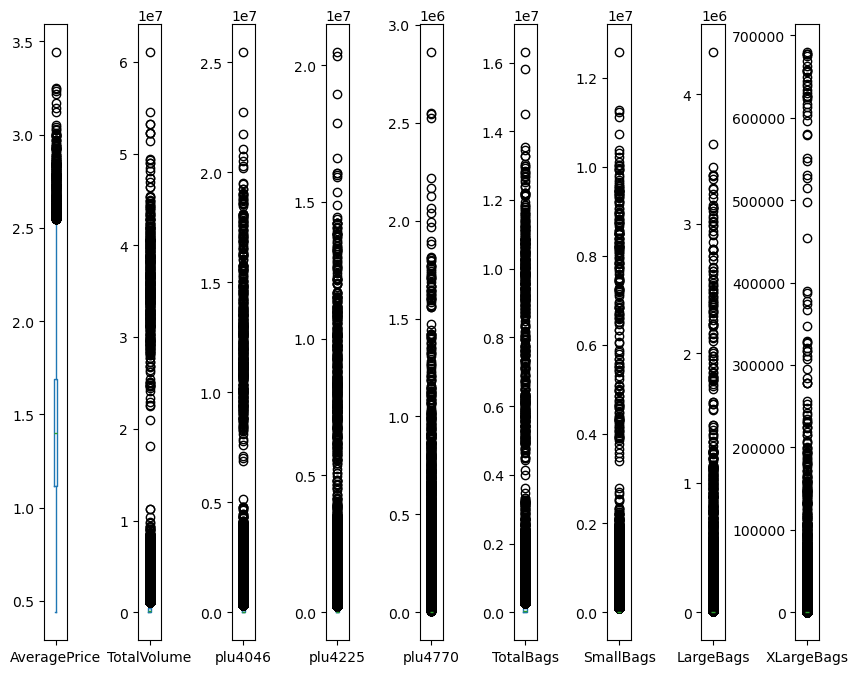

In [123]:
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 8)
)

plt.subplots_adjust(wspace=3.0) 
plt.show()

# boxplot = df.boxplot()

In [125]:
print(df["SmallBags"].mode())

0    0.0
Name: SmallBags, dtype: float64


In [127]:
print(df["LargeBags"].mode())

0    0.0
Name: LargeBags, dtype: float64


In [129]:
print(df["XLargeBags"].mode())

0    0.0
Name: XLargeBags, dtype: float64


The most frequent number in the columns SmallBags, LargeBags and XLargeBags is 0 (the other common elements it was null values).

In [132]:
print(df.mean(numeric_only=True))

AveragePrice         1.428910
TotalVolume     869447.441374
plu4046         298270.749448
plu4225         222217.037654
plu4770          20531.954686
TotalBags       217508.289491
SmallBags       103922.170677
LargeBags        23313.164066
XLargeBags        2731.811796
dtype: float64


The means of the columns with missing data are far from zero(0) and this is due to the high numbers that occur in these columns as seen in the line graphs above pulling the mean values up. So using the mean to replace the missing values is not a good idea.

In [135]:
print(df.median(numeric_only=True))

AveragePrice         1.40
TotalVolume     120352.46
plu4046          14580.58
plu4225          17516.63
plu4770             90.05
TotalBags        36953.10
SmallBags          694.58
LargeBags            0.00
XLargeBags           0.00
dtype: float64


The medians off the coluns with missing data is closer to zero(0) (or exactly zero(0) than it is to the mean. This means the columns are skewed to the left and replacing them with zeros(0) won't affect the skew.

In [138]:
df.fillna(0, inplace = True)

In [140]:
df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags       False
LargeBags       False
XLargeBags      False
type            False
region          False
dtype: bool

We have now replaced the missing values.

### Additional Columns

In [ ]:
# Sales = AveragePrice x TotalVolume
print(type([df.AveragePrice]))
print(type([df.TotalVolume]))
sales = []
for i in range(0,len([df.TotalVolume]),1):
    Sales_ind = [df.AveragePrice][i]*[df.TotalVolume][i]
    sales.append(Sales_ind)


print(sales)
#print(Sales_ind)

In [ ]:
#Group by
x = [df.type]
y = [df.TotalVolume]
Summary = df.groupby(x)[y].sum()


In [ ]:
help('groupby')

## 5. Exploratory Data Analysis (EDA)

##### 5.1.Non-graphical EDA

In [150]:
df.head()

Date  AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
0   2015-01-04          1.22     40873.28   2819.50  28287.42     49.90   
77  2015-01-04          1.54      4212.16    238.48   1678.83    372.55   
76  2015-01-04          1.13    182697.97  56293.75  80396.09   9762.41   
75  2015-01-04          2.01      3397.00     58.22   1493.90    772.21   
74  2015-01-04          1.20    221086.46  53316.16  72178.46  39928.01   

    TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0     9716.46    9186.93     529.53         0.0  conventional   
77    1922.30    1570.28     352.02         0.0       organic   
76   36245.72   31778.36    4467.36         0.0  conventional   
75    1072.67     993.94      78.73         0.0       organic   
74   55663.83   44040.64   11623.19         0.0  conventional   

               region  
0              Albany  
77    RichmondNorfolk  
76    RichmondNorfolk  
75  RaleighGreensboro  
74  RaleighGreensboro

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:

- Date
- AveragePrice
- TotalVolume
- plu4046
- plu4225
- plu4770
- TotalBags
- LargeBags
- XLargeBags
- type
- region

In [155]:
df.info() #to understand the data we have access to.

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     53415 non-null  float64
 8   LargeBags     53415 non-null  float64
 9   XLargeBags    53415 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 5.3+ MB


In [157]:
df.shape #The shape command shows us that we have 53415 rows of data and 12 features.

(53415, 12)

In [159]:
df.isnull().sum() #contain any null values.

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64

In [161]:
df.describe() #descriptive statistics of each column to see if we can spot any anomalies.

AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  5.341500e+04  5.341500e+04   53415.000000  
mean   2.175083e+05  7.981666e+04  1.790551e+04    2098.148066  
std    8.676947e+05  5.008123e+05  1.315293e+05   19830.138171  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    7.846520e+03  0.000000e+00  0.000000e+00       0.000000  
50%    3.695310e+04  0.000000e+00  0.000000e+00       0.000000  
75%    1.110146e+05  1.579169e+04  8.466100e+02       0.000000  
max    1.629830e+07  1.256716e+07  4.324231e+06  679586.800000

In [163]:
df.mode() #determine the mode

Date  AveragePrice  TotalVolume  plu4046  plu4225  plu4770  \
0    2018-01-08          1.26      1954.57      0.0      0.0      0.0   
1    2018-01-14           NaN      2038.99      NaN      NaN      NaN   
2    2018-01-21           NaN      2676.30      NaN      NaN      NaN   
3    2018-01-28           NaN      2817.29      NaN      NaN      NaN   
4    2018-02-04           NaN      2858.31      NaN      NaN      NaN   
..          ...           ...          ...      ...      ...      ...   
304  2023-11-05           NaN          NaN      NaN      NaN      NaN   
305  2023-11-12           NaN          NaN      NaN      NaN      NaN   
306  2023-11-19           NaN          NaN      NaN      NaN      NaN   
307  2023-11-26           NaN          NaN      NaN      NaN      NaN   
308  2023-12-03           NaN          NaN      NaN      NaN      NaN   

     TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0          0.0        0.0        0.0         0.0  conventional   
1          NaN        NaN        NaN         NaN           NaN   
2          NaN        NaN        NaN         NaN           NaN   
3          NaN        NaN        NaN         NaN           NaN   
4          NaN        NaN        NaN         NaN           NaN   
..         ...        ...        ...         ...           ...   
304        NaN        NaN        NaN         NaN           NaN   
305        NaN        NaN        NaN         NaN           NaN   
306        NaN        NaN        NaN         NaN           NaN   
307        NaN        NaN        NaN         NaN           NaN   
308        NaN        NaN        NaN         NaN           NaN   

                  region  
0                 Albany  
1                Atlanta  
2    BaltimoreWashington  
3                  Boise  
4                 Boston  
..                   ...  
304                  NaN  
305                  NaN  
306                  NaN  
307                  NaN  
308                  NaN  

[309 rows x 12 columns]

In [165]:
df.skew(numeric_only=True) #measure of outliers present in the data

AveragePrice     0.506550
TotalVolume      9.176851
plu4046          9.295907
plu4225          9.500352
plu4770         10.448070
TotalBags        9.677191
SmallBags       14.275479
LargeBags       16.114953
XLargeBags      23.078736
dtype: float64

In [167]:
df.kurtosis(numeric_only=True) #Indicates outliers for all features.

AveragePrice      0.020256
TotalVolume      93.837805
plu4046         100.432277
plu4225         107.929611
plu4770         145.112929
TotalBags       108.026215
SmallBags       237.179117
LargeBags       318.246531
XLargeBags      663.039798
dtype: float64

In [169]:
df.select_dtypes(include=['object']).head() #Let's identify the non-numeric data columns in the avocado DataFrame.

Date          type             region
0   2015-01-04  conventional             Albany
77  2015-01-04       organic    RichmondNorfolk
76  2015-01-04  conventional    RichmondNorfolk
75  2015-01-04       organic  RaleighGreensboro
74  2015-01-04  conventional  RaleighGreensboro

In [171]:
df['Date'] = pd.to_datetime(df['Date'])


df['year'] = df['Date'].dt.year

print(df.head())#convert date field to year field so to summarize data

         Date  AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
0  2015-01-04          1.22     40873.28   2819.50  28287.42     49.90   
77 2015-01-04          1.54      4212.16    238.48   1678.83    372.55   
76 2015-01-04          1.13    182697.97  56293.75  80396.09   9762.41   
75 2015-01-04          2.01      3397.00     58.22   1493.90    772.21   
74 2015-01-04          1.20    221086.46  53316.16  72178.46  39928.01   

    TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0     9716.46    9186.93     529.53         0.0  conventional   
77    1922.30    1570.28     352.02         0.0       organic   
76   36245.72   31778.36    4467.36         0.0  conventional   
75    1072.67     993.94      78.73         0.0       organic   
74   55663.83   44040.64   11623.19         0.0  conventional   

               region  year  
0              Albany  2015  
77    RichmondNorfolk  2015  
76    RichmondNorfolk  2015  
75  RaleighGreensboro  2015  
74  RaleighGre

In [173]:
df['year'] = df['year'].astype('object') #converting data types
df['year'].dtype

dtype('O')

In [175]:
df.groupby('year')[['TotalVolume']].sum().sort_values(by='TotalVolume', ascending=False).head(10) #see total volumes per year

TotalVolume
year              
2020  6.019683e+09
2021  5.755039e+09
2023  5.317699e+09
2022  5.291130e+09
2019  4.977871e+09
2018  4.939448e+09
2017  4.934306e+09
2016  4.820890e+09
2015  4.385469e+09

In [177]:
title_day = df.groupby('year')[['TotalVolume','type','region']].sum() #group and sum the data by the number of values for each ‘year’
print(title_day)

       TotalVolume                                               type  \
year                                                                    
2015  4.385469e+09  conventionalorganicconventionalorganicconventi...   
2016  4.820890e+09  organicconventionalorganicconventionalconventi...   
2017  4.934306e+09  conventionalorganicorganicorganicorganicconven...   
2018  4.939448e+09  organicconventionalorganicconventionalorganico...   
2019  4.977871e+09  organicorganicconventionalconventionalconventi...   
2020  6.019683e+09  conventionalorganicconventionalorganicconventi...   
2021  5.755039e+09  organicorganicconventionalorganicconventionalc...   
2022  5.291130e+09  organicconventionalorganicconventionalorganico...   
2023  5.317699e+09  conventionalorganicconventionalorganicconventi...   

                                                 region  
year                                                     
2015  AlbanyRichmondNorfolkRichmondNorfolkRaleighGre...  
2016  RichmondNorfolkR

##### 5.2 univariate analysis

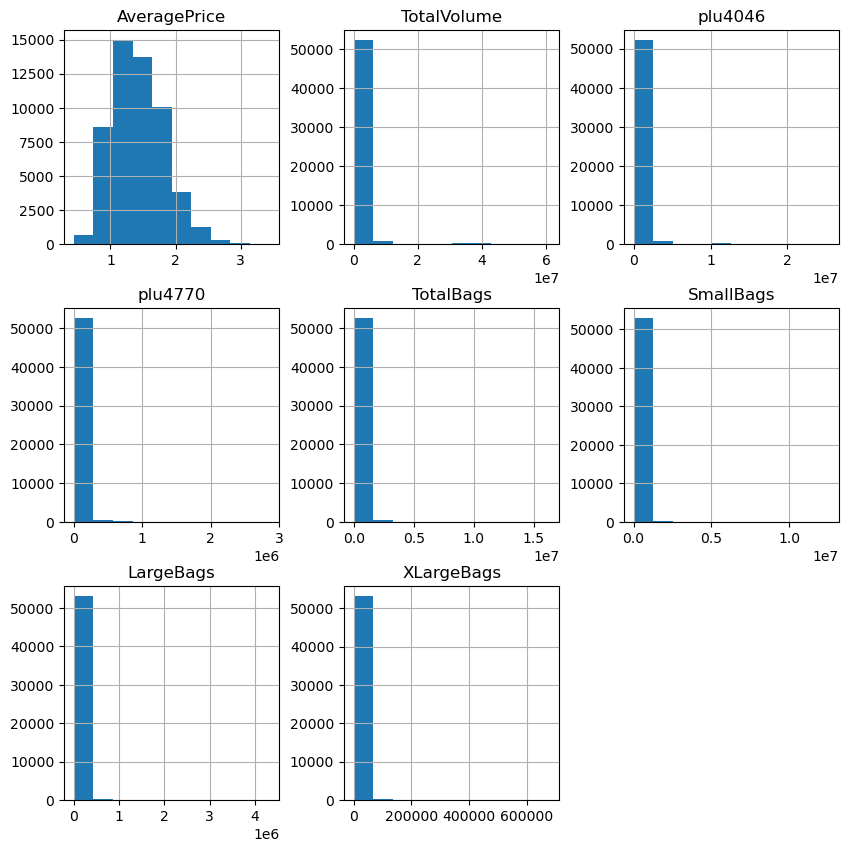

In [183]:
features = ['AveragePrice', 'TotalVolume', 'plu4046', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

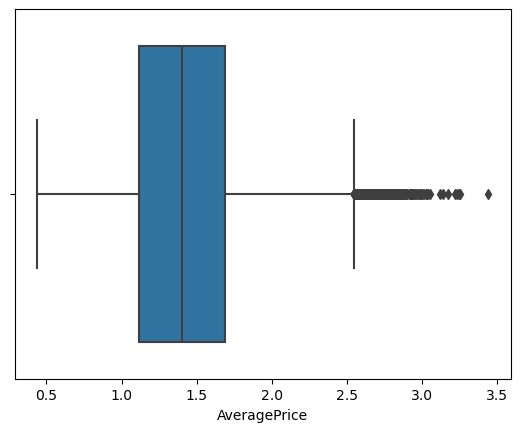

In [185]:
sns.boxplot(x='AveragePrice', data=df);

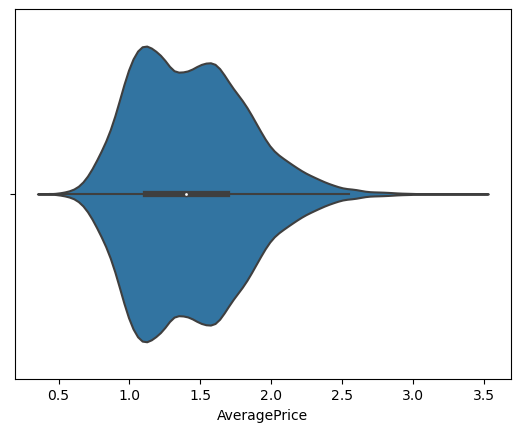

In [187]:
sns.violinplot(x='AveragePrice', data=df);

In [189]:
week_day = title_day.TotalVolume.sort_values().index #sort the indices and store them under the variable week_day
bill = title_day.TotalVolume.sort_values() #sort the rest of the data and store it under the variable bill

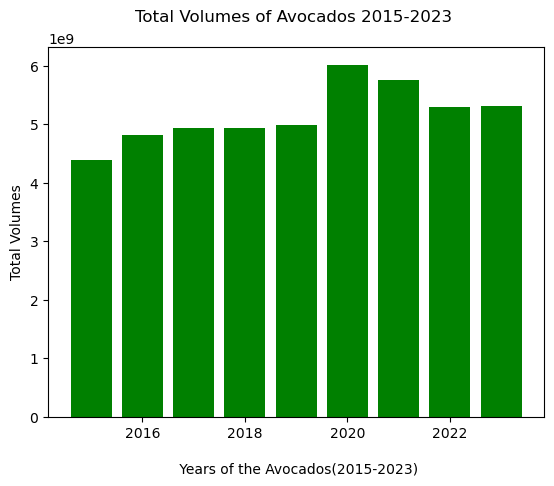

In [191]:
plt.bar(week_day, bill, color= 'green')

# Set x and y-axis titles.
plt.ylabel('Total Volumes')
plt.xlabel('\n Years of the Avocados(2015-2023)') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title.
plt.title('Total Volumes of Avocados 2015-2023 \n')

# Show graph.
plt.show()

In [193]:
df.corr(numeric_only=True) #Correlation is a measure of the degree to which two variables change together, if at all

AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
AveragePrice      1.000000    -0.179153 -0.184299 -0.155367 -0.143928   
TotalVolume      -0.179153     1.000000  0.966413  0.930966  0.817264   
plu4046          -0.184299     0.966413  1.000000  0.880644  0.828545   
plu4225          -0.155367     0.930966  0.880644  1.000000  0.803806   
plu4770          -0.143928     0.817264  0.828545  0.803806  1.000000   
TotalBags        -0.166318     0.965620  0.920839  0.893413  0.775465   
SmallBags        -0.122174     0.615626  0.538474  0.657380  0.474312   
LargeBags        -0.113966     0.511634  0.472419  0.598834  0.434786   
XLargeBags       -0.092132     0.471872  0.380920  0.411533  0.319344   

              TotalBags  SmallBags  LargeBags  XLargeBags  
AveragePrice  -0.166318  -0.122174  -0.113966   -0.092132  
TotalVolume    0.965620   0.615626   0.511634    0.471872  
plu4046        0.920839   0.538474   0.472419    0.380920  
plu4225        0.893413   0.657380   0.598834    0.411533  
plu4770        0.775465   0.474312   0.434786    0.319344  
TotalBags      1.000000   0.709678   0.620035    0.538853  
SmallBags      0.709678   1.000000   0.819424    0.774026  
LargeBags      0.620035   0.819424   1.000000    0.446602  
XLargeBags     0.538853   0.774026   0.446602    1.000000

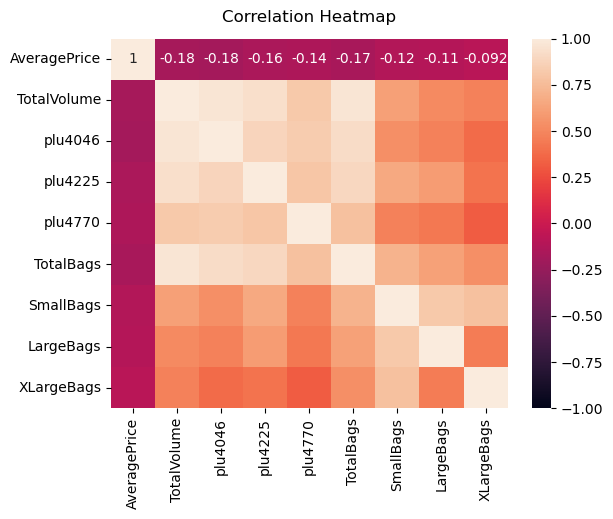

In [199]:
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True) #The relationship between features can also be displayed graphically using a heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [220]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), #correlation between two columns in the dataset.
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('AveragePrice', 'TotalVolume', 'plu4046', 'plu4…

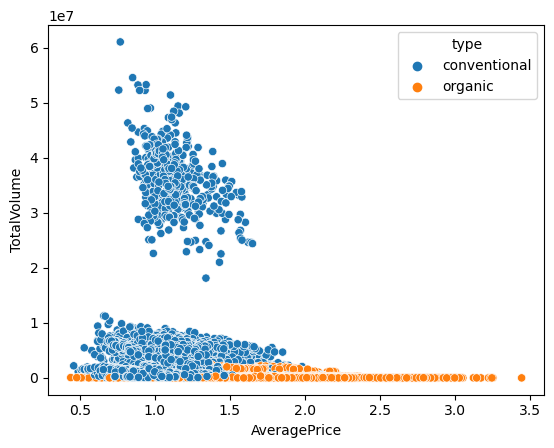

In [224]:
sns.scatterplot(x='AveragePrice',y='TotalVolume',hue='type', data=df); #A Scatter plot is used to visualise the relationship between two different features

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

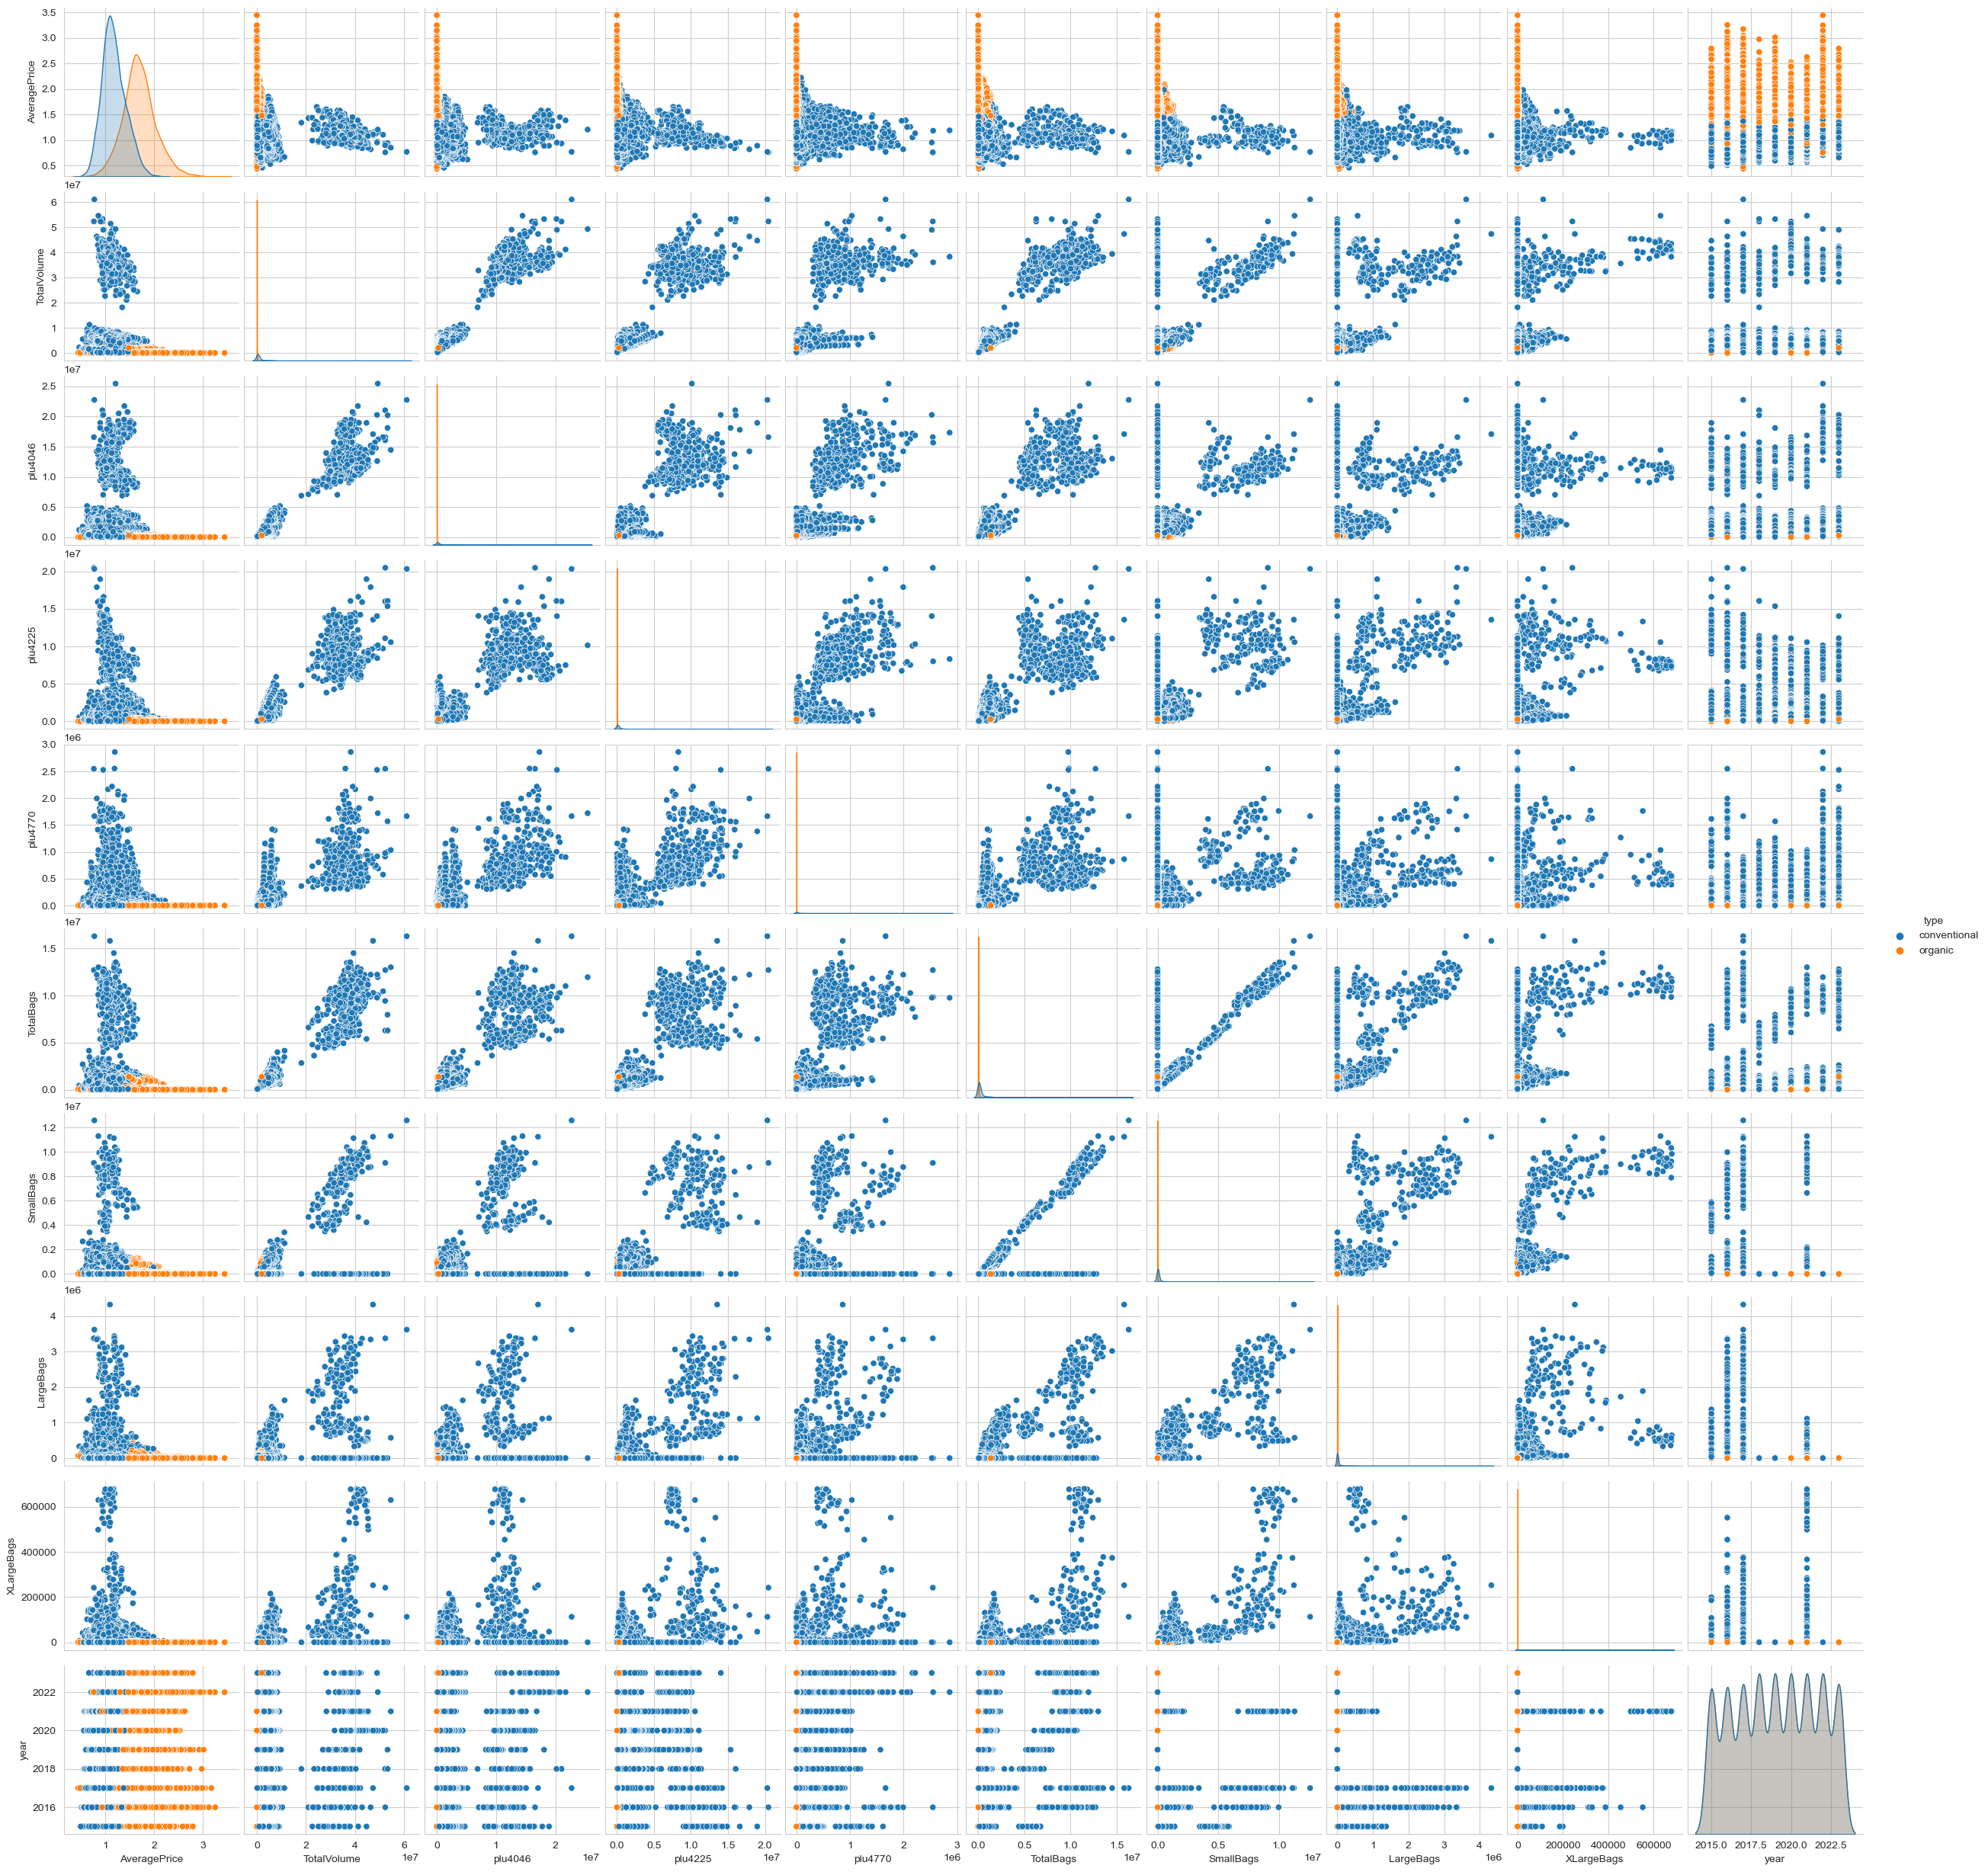

In [226]:
sns.set_style("whitegrid"); #A pair plot can be used to visualise the relationships between all the numerical features at the same time
sns.pairplot(df, hue="type");
plt.show();

A pair plot can be used to visualise the relationships between all the numerical features at the same time. The hue is once again set to the feature type to indicate the type of avocado.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Marcus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



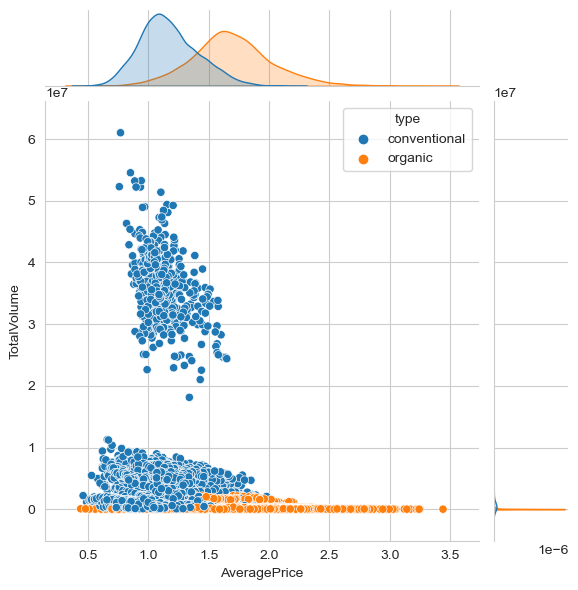

In [228]:
sns.jointplot(x = 'AveragePrice', y = 'TotalVolume', data = df, hue='type');

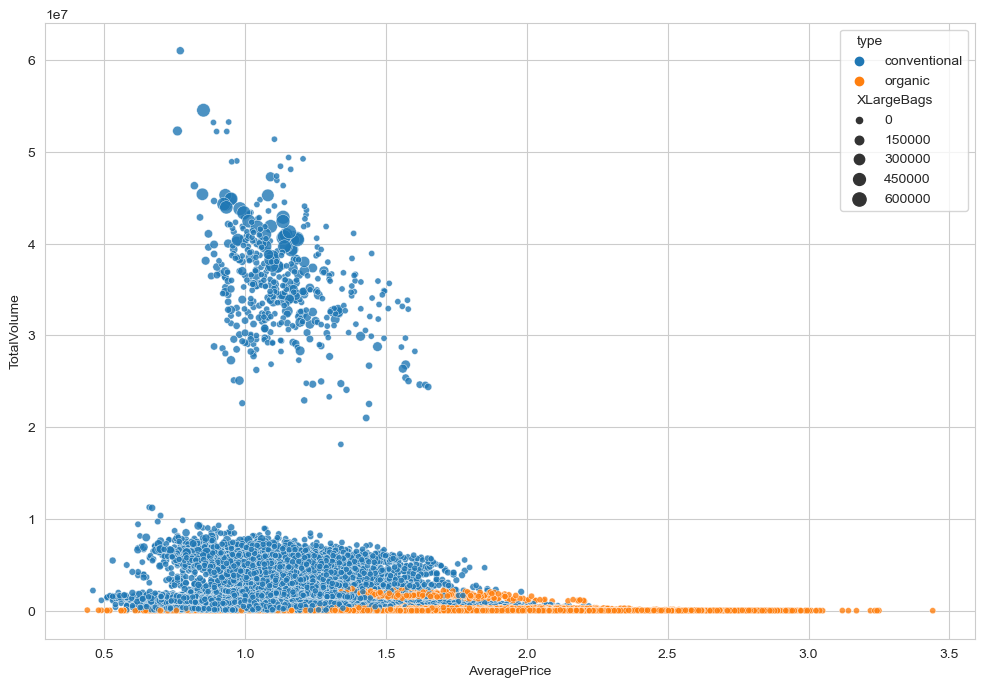

In [231]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="AveragePrice", 
                y="TotalVolume",
                size="XLargeBags",
                sizes=(20,100),
                alpha=0.8,
                hue="type",
                data=df);

## 6. Detailed Insights and Conclusions

## 7. Appendix

##### 7.1. Git Space Glossary

Links? DEV Space: [Example Website](https://www.example.com "Visit Example Website")
PROD Space : [Example Website](https://www.example.com "Visit Example Website")
Dataset Source: [Example Website](https://www.example.com "Visit Example Website")

###### 7.2. 